In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
groupA = ['person1', 'person2', 'person3', 'person4', 'person5', 'person6', 'person7']
groupB = ['person1', 'person2', 'person3', 'person8', 'person9']
groupC = ['person1', 'person2', 'person4', 'person9', 'person10']
 
df = pd.concat([pd.Series(groupA), pd.Series(groupB), pd.Series(groupC)], ignore_index=True, axis=1)
map_dict = {0:'A', 1: 'B', 2: 'C'}
df.rename(columns=map_dict, inplace=True)
df

,A,B,C
0,person1,person1,person1
1,person2,person2,person2
2,person3,person3,person4
3,person4,person8,person9
4,person5,person9,person10
5,person6,NaN,NaN
6,person7,NaN,NaN


In [3]:
df_melt = pd.melt(df)
df_melt

,variable,value
0,A,person1
1,A,person2
2,A,person3
3,A,person4
4,A,person5
...,...,...
16,C,person4
17,C,person9
18,C,person10
19,C,NaN


In [4]:
df_melt = df_melt[np.invert(df_melt.value.isna())]
df_melt

,variable,value
0,A,person1
1,A,person2
2,A,person3
3,A,person4
4,A,person5
...,...,...
14,C,person1
15,C,person2
16,C,person4
17,C,person9


In [5]:
grouped_multiple_memberships_allowed = df_melt.groupby(['variable']).count()
grouped_multiple_memberships_allowed

,value
variable,
A,7
B,5
C,5


In [6]:
names = grouped_multiple_memberships_allowed.index.to_list()
counts = grouped_multiple_memberships_allowed.value.to_list()
print(names)
print(counts)

['A', 'B', 'C']
[7, 5, 5]


In [7]:
names_with_counts = [names[i]+' ('+str(counts[i])+')' for i in range(len(names))]
names_with_counts

['A (7)', 'B (5)', 'C (5)']

In [8]:
prep_df = pd.DataFrame({'count':counts,
                        'labels':names_with_counts})
print('Counts: ' + str(counts))
print('Labels: ' + str(names_with_counts))
print('')
print(prep_df)

Counts: [7, 5, 5]
Labels: ['A (7)', 'B (5)', 'C (5)']

   count labels
0      7  A (7)
1      5  B (5)
2      5  C (5)


In [9]:
#Default Settings
import squarify
import random
random.seed(1)

norms = squarify.normalize_sizes(prep_df['count'].to_list(),  dx=3, dy=3)
norms

[3.7058823529411766, 2.6470588235294117, 2.6470588235294117]

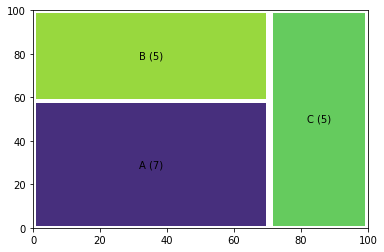

In [10]:
squarify.plot(sizes=norms, label=prep_df['labels'].to_list(), alpha=1, pad=True)
plt.show()

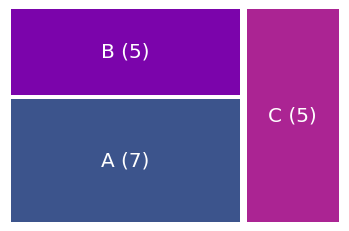

In [11]:
#Customized text size, text color, rectangle color through rcParams
#Removed axis for visual appeal
color = 'white'
mpl.rcParams['text.color'] = color
mpl.rcParams['font.size'] = 20
some_colors = ['#3c548c', '#7b04ab', '#ab2493']

squarify.plot(sizes=norms, label=prep_df['labels'].to_list(), 
              color=some_colors,
              alpha=1, pad=True)
plt.axis('off')
plt.show()

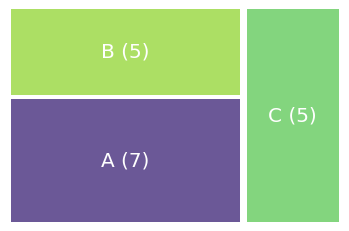

In [12]:
#Lazy, Randomly Generated Colors
random.seed(1)

cmap = mpl.colormaps.get_cmap('viridis')
squarify.plot(sizes=norms, label=prep_df['labels'].to_list(), alpha=0.8, pad=True, 
              color=[cmap(random.random()) for i in range(len(counts))])
plt.axis('off')
plt.show()

In [13]:
[cmap(random.random()) for i in range(len(counts))]

[(0.227802, 0.326594, 0.546532, 1.0),
 (0.129933, 0.559582, 0.551864, 1.0),
 (0.144759, 0.519093, 0.556572, 1.0)]

In [14]:
list_bet_0_and_1 = [i for i in np.arange(0, 1, 1/len(counts))]
list_bet_0_and_1

[0.0, 0.3333333333333333, 0.6666666666666666]

In [15]:
cmap = mpl.colormaps['plasma']
mapped_list = [cmap(i) for i in np.arange(0, 1, 1/len(counts))]
mapped_list

[(0.050383, 0.029803, 0.527975, 1.0),
 (0.610667, 0.090204, 0.619951, 1.0),
 (0.928329, 0.472975, 0.326067, 1.0)]

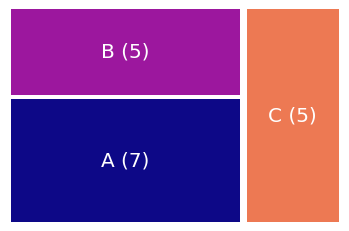

In [16]:
squarify.plot(sizes=norms, label=prep_df['labels'].to_list(),
             alpha=1, pad=True, color=mapped_list)
plt.axis('off')
plt.show()

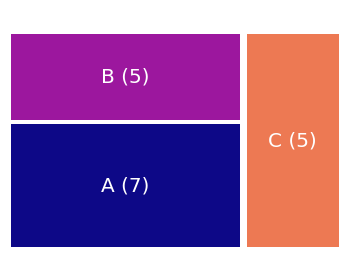

In [17]:
#troubleshooting title
mpl.rcParams['text.color'] = 'white'

squarify.plot(sizes=norms, label=prep_df['labels'].to_list(), 
              alpha=1, pad=True, 
              color=mapped_list)
plt.title("this won't show (white)")
plt.axis('off')
plt.show()

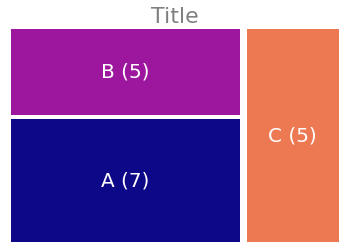

In [18]:
#add title
mpl.rcParams['text.color'] = 'white'

squarify.plot(sizes=norms, label=prep_df['labels'].to_list(), 
              alpha=1, pad=True, 
              color=mapped_list)
#plt.title("this won't show (white)")
plt.axis('off')

#adding text box inside plot
plt.text(50, 100,                     #sets position to place text using data coordinates
         'Title',                     #title string
         fontsize = 22, 
         color='grey', 
         horizontalalignment='center', #within the text box, aligns horizontally
         verticalalignment='bottom')  #within the text box, aligns towards top? I have no explanation for why syntax seems backward.
plt.show()

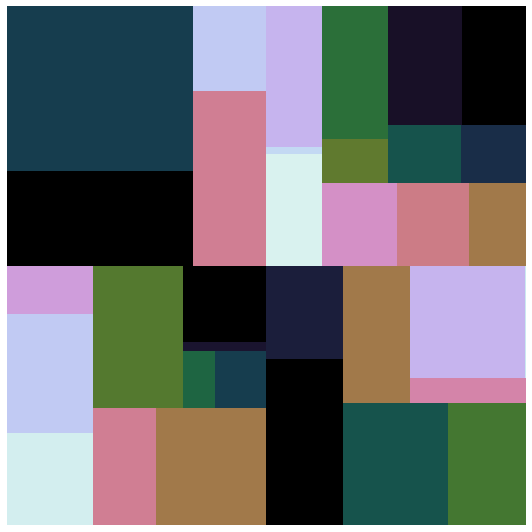

In [19]:
#use seaborn color map
#reverse colormap order

#cmap = mpl.cm.get_cmap('icefire')
cmap = sns.color_palette('cubehelix', as_cmap=True)
mapped_list_5 = [cmap(i) for i in np.arange(0, 1, 1/len(counts))]

fig, axes = plt.subplots(2, 2, figsize=(8, 8)) 
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.05, right=0.95)

np.random.seed(1)
sq = 5
squarify.plot(np.random.rand(sq), color=[cmap(i) for i in np.arange(0, 1, 1/len(np.random.rand(sq)))], ax=axes[0, 0])

np.random.seed(2)
sq = 12
#squarify.plot(np.random.rand(sq), color=[cmap(i) for i in np.arange(0, 1, 1/len(np.random.rand(sq)))], ax=axes[0, 1])
squarify.plot(np.random.rand(sq), color=[cmap(i) for i in np.flip(np.arange(0, 1, 1/len(np.random.rand(sq))))], ax=axes[0, 1])

np.random.seed(3)
sq = 10
#squarify.plot(np.random.rand(sq), color=[cmap(i) for i in np.arange(0, 1, 1/len(np.random.rand(sq)))], ax=axes[1, 0])
squarify.plot(np.random.rand(sq), color=[cmap(i) for i in np.flip(np.arange(0, 1, 1/len(np.random.rand(sq))))], ax=axes[1, 0])

np.random.seed(4)
sq = 8
squarify.plot(np.random.rand(sq), color=[cmap(i) for i in np.arange(0, 1, 1/len(np.random.rand(sq)))], ax=axes[1, 1])

axes[0, 0].axis('off')                            
axes[0, 1].axis('off')                            
axes[1, 0].axis('off')
axes[1, 1].axis('off')

plt.subplots_adjust(wspace=0, hspace=0)     #adjust spacing between plots
plt.show()